# Preliminaries

In [2]:
import random
import numpy as np
import seaborn
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
sys.path.append("../causalFS/CMI_FS")
from mixedRVMI import MIEstimate,estimateAllMI,CMIEstimate
from feature_selection import backwardFeatureSelection,forwardFeatureSelection
sys.path.append("../causalFS/CMI")
from FS import backwardFeatureSelection, forwardFeatureSelection
from TE_FS import TE_backwardFeatureSelection, TE_forwardFeatureSelection

sys.path.append("../causalFS/data")
from dataset_generation import generate_dataset

sys.path.append("../causalFS/droughts")
from aux import prepare_target

In [4]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
#from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

In [5]:
def concatenate_past(x,lag):
    lag_x = x[lag-1:-1].reshape(-1,1)
    if lag<=1: return lag_x
        
    for i in range(lag-1):
        lag_x = np.concatenate((lag_x, x[lag-i-2:-i-2].reshape(-1,1)),axis=1)
        
    return lag_x

In [6]:
def PCMCI_singleBasin(df,tau=0,cond_test=ParCorr()):    

    dataframe = pp.DataFrame(df.values)
    
    cond_ind_test = cond_test
    pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)
    results = pcmci.run_pcmciplus(tau_min=1, tau_max=tau)
    #results = pcmci.run_pcmci(tau_max=tau, pc_alpha=0.01)

    pcmci.print_significant_links(p_matrix=results['p_matrix'],val_matrix=results['val_matrix'])
    
    tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=list(df.columns),
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    )
    plt.show()
    
    tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=list(df.columns),
    link_colorbar_label='MCI',
    )
    plt.show()
    

In [7]:
def fullCI_singleBasin(df,tau=0,cond_test=ParCorr()):    

    dataframe = pp.DataFrame(df.values)
    
    cond_ind_test = cond_test
    pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)
    #results = pcmci.run_pcmciplus(tau_max=tau, pc_alpha=0.01)
    #results = pcmci.run_pcmci(tau_max=tau, pc_alpha=0.01)
    results = pcmci.run_fullci(tau_min=1, tau_max=tau)

    pcmci.print_significant_links(p_matrix=results['p_matrix'],val_matrix=results['val_matrix'])
    
    tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=list(df.columns),
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    )
    plt.show()
    
    tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=list(df.columns),
    link_colorbar_label='MCI',
    )
    plt.show()
    

# Data

In [8]:
### considering column 0 as target
df_5 = pd.read_csv('../causalFS/data/TestWEATHnoise_N-5_T-1000_0001.txt', sep=" ", header=None)

## PCMCI and FullCI linear and with CMI

### Tau = 1


## Significant links at alpha = 0.05:

    Variable 0 has 1 link(s):
        (0 -1): pval = 0.00000 | val =  0.373

    Variable 1 has 1 link(s):
        (1 -1): pval = 0.00002 | val = -0.135

    Variable 2 has 3 link(s):
        (4 -1): pval = 0.00000 | val =  0.230
        (3 -1): pval = 0.00000 | val =  0.205
        (2 -1): pval = 0.01550 | val = -0.077

    Variable 3 has 3 link(s):
        (2 -1): pval = 0.00047 | val = -0.111
        (3 -1): pval = 0.00126 | val =  0.102
        (4 -1): pval = 0.02227 | val =  0.072

    Variable 4 has 2 link(s):
        (3 -1): pval = 0.00078 | val = -0.106
        (2 -1): pval = 0.01456 | val = -0.077


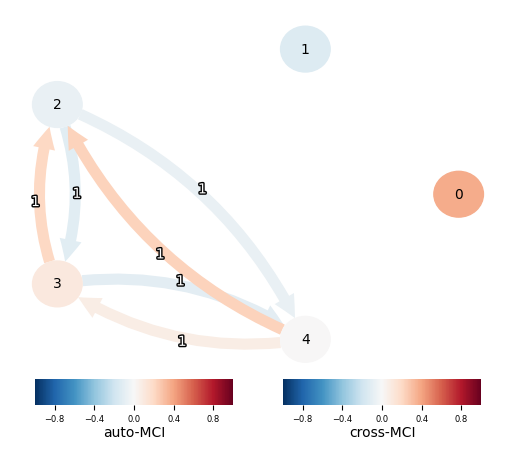

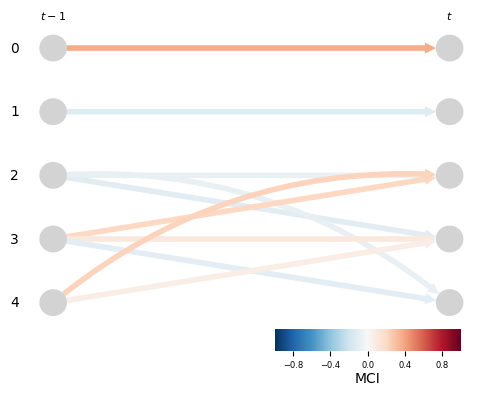

In [19]:
fullCI_singleBasin(df_5,tau=1)


## Significant links at alpha = 0.05:

    Variable 0 has 1 link(s):
        (0 -1): pval = 0.00000 | val =  0.309

    Variable 1 has 1 link(s):
        (1 -1): pval = 0.00004 | val = -0.129

    Variable 2 has 3 link(s):
        (4 -1): pval = 0.00000 | val =  0.212
        (3 -1): pval = 0.00000 | val =  0.208
        (2 -1): pval = 0.02609 | val = -0.070

    Variable 3 has 3 link(s):
        (3 -1): pval = 0.00001 | val =  0.144
        (2 -1): pval = 0.00304 | val = -0.094
        (4 -1): pval = 0.02343 | val =  0.072

    Variable 4 has 2 link(s):
        (3 -1): pval = 0.00054 | val = -0.109
        (2 -1): pval = 0.02394 | val = -0.072


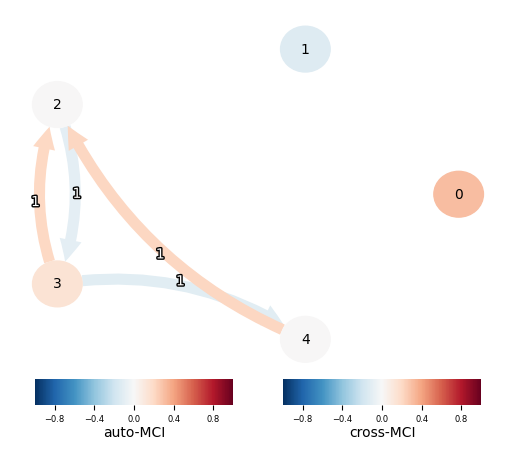

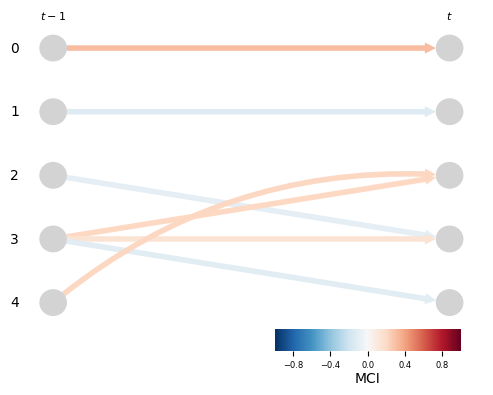

In [20]:
PCMCI_singleBasin(df_5,tau=1)


## Significant links at alpha = 0.05:

    Variable 0 has 1 link(s):
        (0 -1): pval = 0.00000 | val =  0.031

    Variable 1 has 1 link(s):
        (1 -1): pval = 0.00000 | val =  0.010

    Variable 2 has 3 link(s):
        (4 -1): pval = 0.00000 | val =  0.017
        (3 -1): pval = 0.00000 | val =  0.012
        (2 -1): pval = 0.00200 | val =  0.008

    Variable 3 has 2 link(s):
        (3 -1): pval = 0.00200 | val =  0.010
        (2 -1): pval = 0.02600 | val =  0.008

    Variable 4 has 1 link(s):
        (3 -1): pval = 0.01400 | val =  0.007


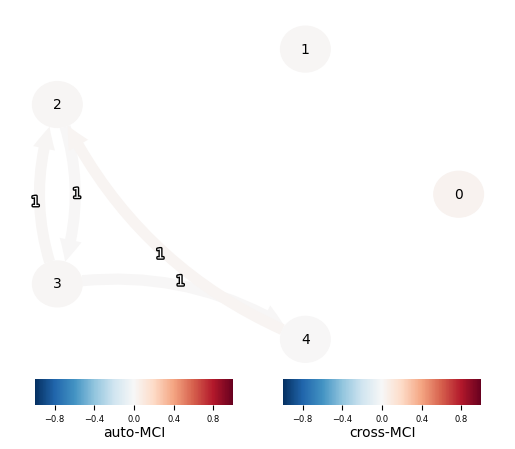

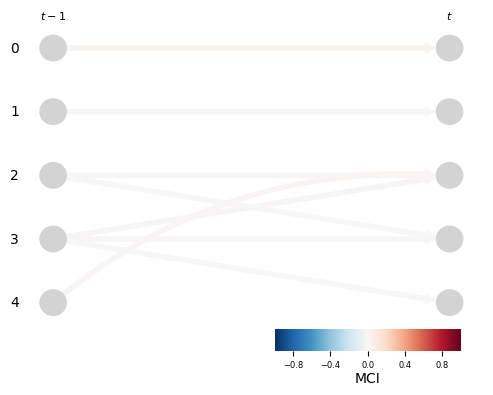

In [21]:
fullCI_singleBasin(df_5,tau=1,cond_test=CMIknn())


## Significant links at alpha = 0.05:

    Variable 0 has 1 link(s):
        (0 -1): pval = 0.00000 | val =  0.040

    Variable 1 has 1 link(s):
        (1 -1): pval = 0.00000 | val =  0.012

    Variable 2 has 2 link(s):
        (4 -1): pval = 0.00000 | val =  0.020
        (3 -1): pval = 0.00000 | val =  0.013

    Variable 3 has 2 link(s):
        (3 -1): pval = 0.00000 | val =  0.011
        (2 -1): pval = 0.00600 | val =  0.008

    Variable 4 has 0 link(s):


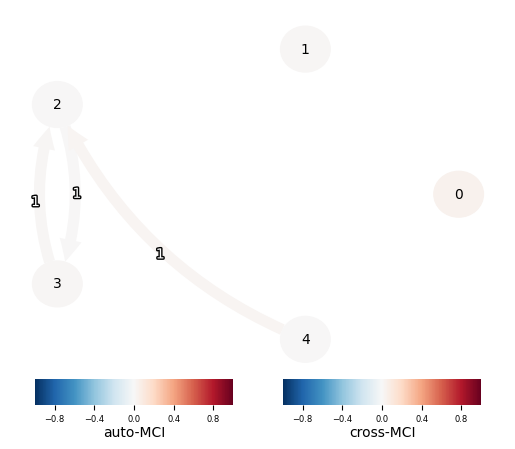

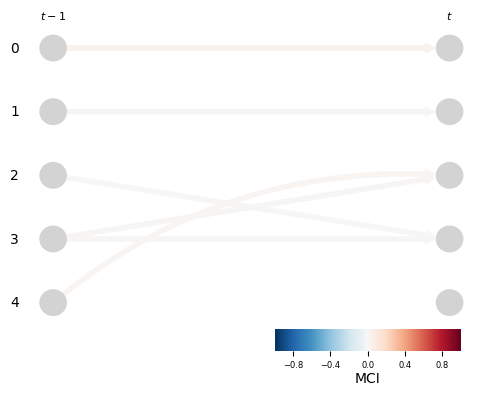

In [22]:
PCMCI_singleBasin(df_5,tau=1,cond_test=CMIknn())

### Tau = 2


## Significant links at alpha = 0.05:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | val =  0.308
        (0 -2): pval = 0.00001 | val =  0.140

    Variable 1 has 3 link(s):
        (1 -1): pval = 0.00005 | val = -0.128
        (2 -2): pval = 0.00356 | val =  0.093
        (4 -2): pval = 0.00684 | val = -0.086

    Variable 2 has 5 link(s):
        (3 -1): pval = 0.00000 | val =  0.224
        (4 -1): pval = 0.00000 | val =  0.198
        (2 -2): pval = 0.00001 | val = -0.140
        (4 -2): pval = 0.00005 | val = -0.129
        (3 -2): pval = 0.00245 | val = -0.096

    Variable 3 has 4 link(s):
        (2 -2): pval = 0.00000 | val =  0.149
        (3 -1): pval = 0.00015 | val =  0.120
        (2 -1): pval = 0.01182 | val = -0.080
        (4 -1): pval = 0.01766 | val =  0.076

    Variable 4 has 3 link(s):
        (2 -2): pval = 0.00000 | val =  0.204
        (3 -1): pval = 0.00783 | val = -0.085
        (4 -2): pval = 0.04331 | val = -0.064


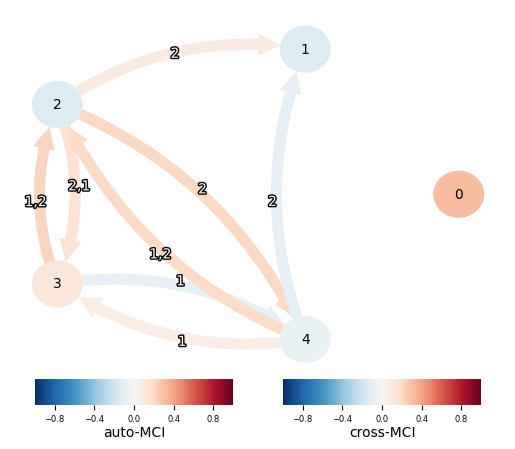

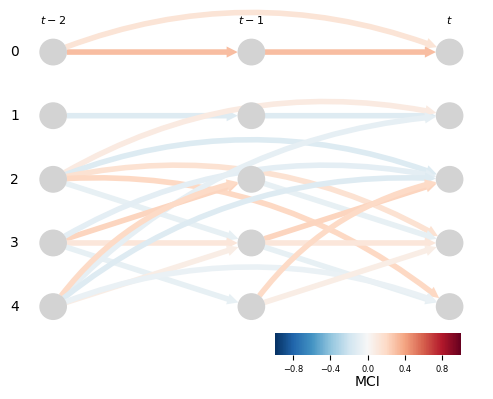

In [23]:
fullCI_singleBasin(df_5,tau=2)


## Significant links at alpha = 0.05:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | val =  0.301
        (0 -2): pval = 0.00031 | val =  0.114

    Variable 1 has 3 link(s):
        (1 -1): pval = 0.00004 | val = -0.130
        (2 -2): pval = 0.00077 | val =  0.107
        (4 -2): pval = 0.01355 | val = -0.078

    Variable 2 has 6 link(s):
        (3 -1): pval = 0.00000 | val =  0.211
        (4 -1): pval = 0.00000 | val =  0.181
        (2 -2): pval = 0.00007 | val = -0.127
        (4 -2): pval = 0.00088 | val = -0.106
        (3 -2): pval = 0.00165 | val = -0.100
        (2 -1): pval = 0.02477 | val = -0.071

    Variable 3 has 5 link(s):
        (3 -1): pval = 0.00000 | val =  0.146
        (4 -1): pval = 0.01250 | val =  0.079
        (4 -2): pval = 0.01286 | val = -0.079
        (2 -2): pval = 0.02178 | val =  0.073
        (2 -1): pval = 0.03533 | val = -0.067

    Variable 4 has 5 link(s):
        (2 -2): pval = 0.00003 | val =  0.132
        (3 -1): pval = 0

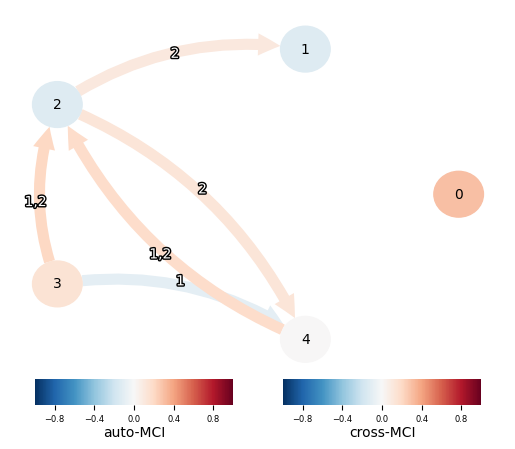

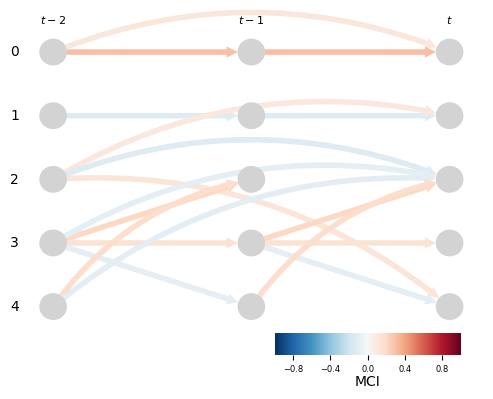

In [24]:
PCMCI_singleBasin(df_5,tau=2)


## Significant links at alpha = 0.05:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | val =  0.015
        (0 -2): pval = 0.00000 | val =  0.008

    Variable 1 has 1 link(s):
        (1 -1): pval = 0.00000 | val =  0.008

    Variable 2 has 4 link(s):
        (4 -1): pval = 0.00000 | val =  0.012
        (3 -1): pval = 0.00000 | val =  0.011
        (2 -2): pval = 0.00400 | val =  0.006
        (4 -2): pval = 0.04000 | val =  0.006

    Variable 3 has 1 link(s):
        (3 -1): pval = 0.00000 | val =  0.008

    Variable 4 has 2 link(s):
        (2 -2): pval = 0.00000 | val =  0.009
        (4 -2): pval = 0.03600 | val =  0.006


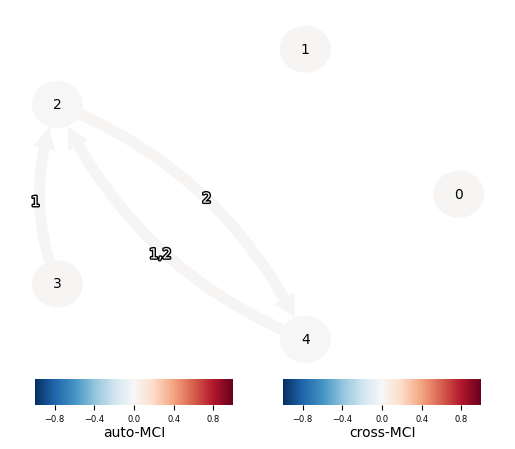

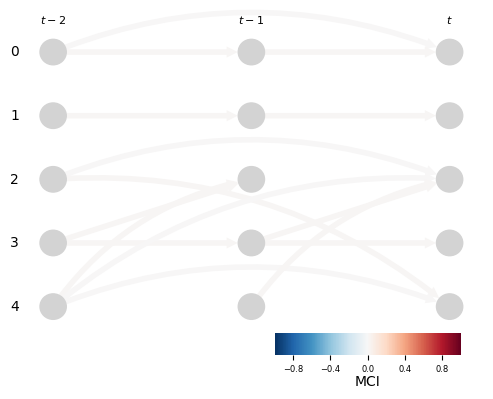

In [25]:
fullCI_singleBasin(df_5,tau=2,cond_test=CMIknn())


## Significant links at alpha = 0.05:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | val =  0.031
        (0 -2): pval = 0.01600 | val =  0.008

    Variable 1 has 2 link(s):
        (1 -1): pval = 0.00000 | val =  0.012
        (2 -2): pval = 0.02800 | val =  0.007

    Variable 2 has 6 link(s):
        (4 -1): pval = 0.00000 | val =  0.015
        (3 -1): pval = 0.00000 | val =  0.013
        (3 -2): pval = 0.01400 | val =  0.009
        (4 -2): pval = 0.02000 | val =  0.008
        (2 -2): pval = 0.01600 | val =  0.007
        (2 -1): pval = 0.04200 | val =  0.006

    Variable 3 has 3 link(s):
        (3 -1): pval = 0.00000 | val =  0.018
        (2 -1): pval = 0.01400 | val =  0.009
        (4 -2): pval = 0.03000 | val =  0.007

    Variable 4 has 3 link(s):
        (3 -1): pval = 0.02000 | val =  0.010
        (2 -2): pval = 0.00400 | val =  0.009
        (4 -2): pval = 0.00000 | val =  0.008


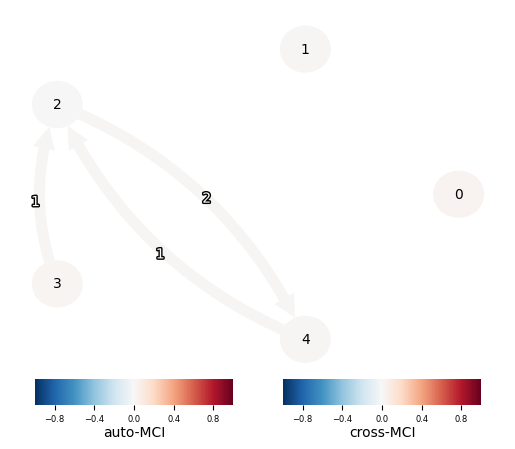

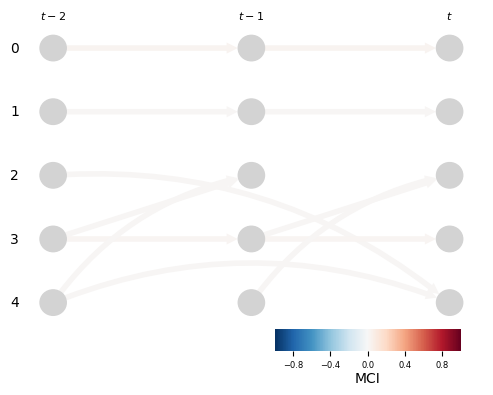

In [26]:
PCMCI_singleBasin(df_5,tau=2,cond_test=CMIknn())

### Tau = 3


## Significant links at alpha = 0.05:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | val =  0.292
        (0 -2): pval = 0.00019 | val =  0.119

    Variable 1 has 3 link(s):
        (1 -1): pval = 0.00005 | val = -0.130
        (2 -2): pval = 0.00053 | val =  0.110
        (4 -2): pval = 0.00300 | val = -0.095

    Variable 2 has 8 link(s):
        (3 -1): pval = 0.00000 | val =  0.218
        (4 -1): pval = 0.00000 | val =  0.177
        (2 -2): pval = 0.00001 | val = -0.143
        (4 -2): pval = 0.00018 | val = -0.120
        (3 -2): pval = 0.00086 | val = -0.106
        (2 -3): pval = 0.00794 | val =  0.085
        (0 -2): pval = 0.01960 | val =  0.075
        (3 -3): pval = 0.02361 | val =  0.072

    Variable 3 has 6 link(s):
        (3 -1): pval = 0.00007 | val =  0.126
        (2 -2): pval = 0.00130 | val =  0.103
        (4 -1): pval = 0.00702 | val =  0.086
        (3 -3): pval = 0.01802 | val =  0.076
        (4 -3): pval = 0.03327 | val =  0.068
        (

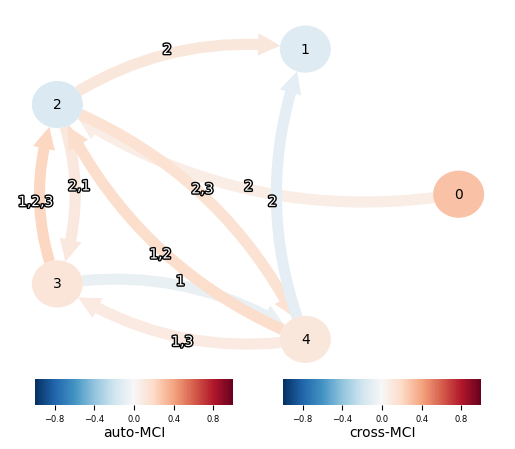

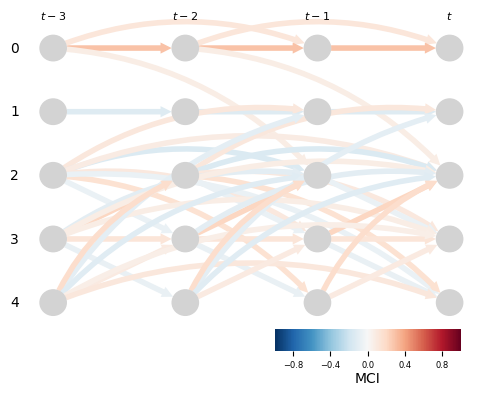

In [30]:
fullCI_singleBasin(df_5,tau=3)


## Significant links at alpha = 0.05:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | val =  0.296
        (0 -2): pval = 0.00036 | val =  0.113

    Variable 1 has 3 link(s):
        (1 -1): pval = 0.00003 | val = -0.132
        (2 -2): pval = 0.00062 | val =  0.109
        (4 -2): pval = 0.01723 | val = -0.076

    Variable 2 has 7 link(s):
        (3 -1): pval = 0.00000 | val =  0.203
        (4 -1): pval = 0.00000 | val =  0.166
        (2 -2): pval = 0.00012 | val = -0.123
        (3 -2): pval = 0.00220 | val = -0.097
        (4 -2): pval = 0.00326 | val = -0.094
        (2 -1): pval = 0.02445 | val = -0.071
        (4 -3): pval = 0.02487 | val = -0.071

    Variable 3 has 6 link(s):
        (3 -1): pval = 0.00000 | val =  0.155
        (3 -3): pval = 0.00335 | val =  0.093
        (4 -1): pval = 0.01045 | val =  0.081
        (4 -2): pval = 0.01119 | val = -0.080
        (4 -3): pval = 0.02111 | val =  0.073
        (2 -2): pval = 0.03025 | val =  0.069

    Vari

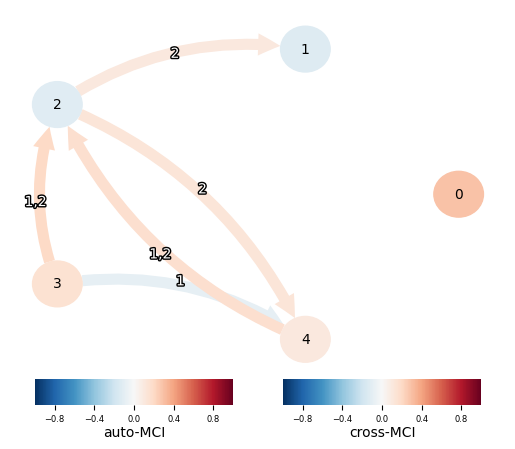

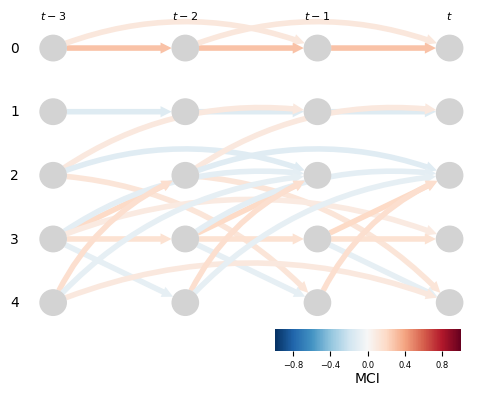

In [31]:
PCMCI_singleBasin(df_5,tau=3)


## Significant links at alpha = 0.05:

    Variable 0 has 2 link(s):
        (0 -1): pval = 0.00000 | val =  0.011
        (0 -2): pval = 0.00400 | val =  0.007

    Variable 1 has 2 link(s):
        (1 -1): pval = 0.04000 | val =  0.007
        (4 -1): pval = 0.03600 | val =  0.006

    Variable 2 has 3 link(s):
        (3 -1): pval = 0.00000 | val =  0.010
        (4 -1): pval = 0.00000 | val =  0.009
        (2 -3): pval = 0.00800 | val =  0.008

    Variable 3 has 4 link(s):
        (3 -1): pval = 0.00000 | val =  0.008
        (2 -2): pval = 0.01400 | val =  0.007
        (1 -2): pval = 0.02800 | val =  0.006
        (1 -1): pval = 0.05000 | val =  0.006

    Variable 4 has 4 link(s):
        (2 -2): pval = 0.00400 | val =  0.008
        (4 -3): pval = 0.01000 | val =  0.008
        (3 -3): pval = 0.01800 | val =  0.007
        (2 -3): pval = 0.03200 | val =  0.006


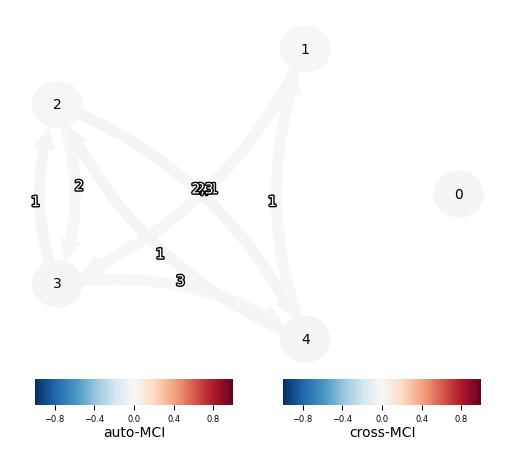

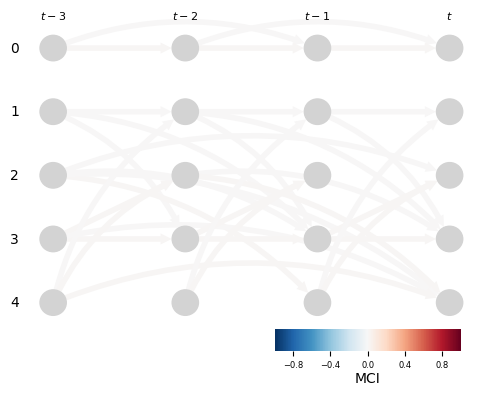

In [32]:
fullCI_singleBasin(df_5,tau=3,cond_test=CMIknn())


## Significant links at alpha = 0.05:

    Variable 0 has 3 link(s):
        (0 -1): pval = 0.00000 | val =  0.040
        (0 -2): pval = 0.01200 | val =  0.015
        (0 -3): pval = 0.01200 | val =  0.010

    Variable 1 has 2 link(s):
        (1 -1): pval = 0.00000 | val =  0.012
        (2 -2): pval = 0.01800 | val =  0.007

    Variable 2 has 5 link(s):
        (4 -1): pval = 0.00200 | val =  0.013
        (3 -1): pval = 0.00000 | val =  0.011
        (3 -2): pval = 0.01200 | val =  0.009
        (4 -2): pval = 0.02400 | val =  0.008
        (2 -1): pval = 0.01200 | val =  0.007

    Variable 3 has 5 link(s):
        (3 -1): pval = 0.00000 | val =  0.009
        (3 -3): pval = 0.01800 | val =  0.008
        (4 -2): pval = 0.03200 | val =  0.007
        (2 -1): pval = 0.00600 | val =  0.007
        (4 -3): pval = 0.00000 | val =  0.007

    Variable 4 has 4 link(s):
        (2 -2): pval = 0.00000 | val =  0.010
        (3 -1): pval = 0.02600 | val =  0.009
        (4 -2): pval = 0

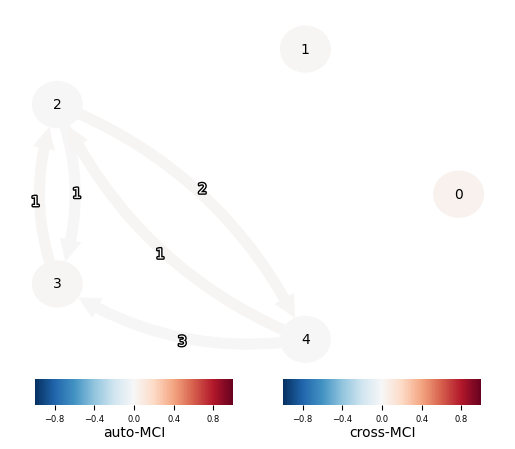

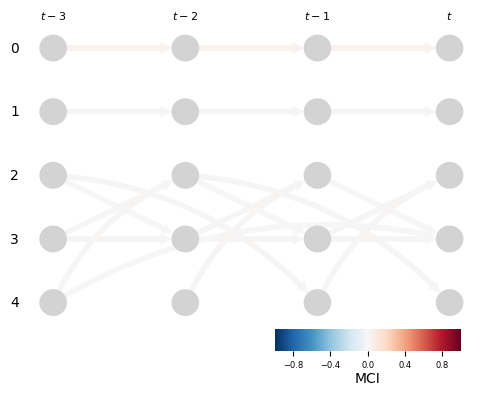

In [33]:
PCMCI_singleBasin(df_5,tau=3,cond_test=CMIknn())

## forward and backward TE, tau from 1 to 3

In [ ]:
x = df_5.iloc[:,1:].values
y = df_5.iloc[:,0].values.reshape(-1,1)


In [27]:
for tau in [1,2,3]:
    for k in [10,15,20,25,30]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_forwardFeatureSelection(threshold=100,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
Highest CMI score: -0.00211531232937881
[]
###### tau=1 #########
Highest CMI score: -0.010960985008045078
[]
###### tau=1 #########
Highest CMI score: -0.024506645990501043
[]
###### tau=1 #########
Highest CMI score: -0.024670930269721433
[]
###### tau=1 #########
Highest CMI score: -0.021742265800309343
[]
###### tau=2 #########
Highest CMI score: -0.055359291691928804
[]
###### tau=2 #########
Highest CMI score: -0.06355037358905877
[]
###### tau=2 #########
Highest CMI score: -0.06372416744076817
[]
###### tau=2 #########
Highest CMI score: -0.06905319674141944
[]
###### tau=2 #########
Highest CMI score: -0.07118413254812242
[]
###### tau=3 #########
Highest CMI score: -0.075108600856621
[]
###### tau=3 #########
Highest CMI score: -0.08063667876119966
[]
###### tau=3 #########
Highest CMI score: -0.08372227685905409
[]
###### tau=3 #########
Highest CMI score: -0.08279044800505145
[]
###### tau=3 #########
Highest CMI score: -0.0805233769469653
[]


In [29]:
for tau in [1,2,3]:
    for k in [10,15,20,25,30]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_backwardFeatureSelection(threshold=0.00000001,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
[(3, -0.0008037839534864866), (1, -0.0004086177332718856), (0, -5.656114588296437e-05), (2, 0.0)]
Removing original feature: 3
[(1, -0.018552929857771898), (0, -0.016468539547774497), (2, -0.002709639817106896)]
Removing original feature: 1
[(0, -0.0493967305652742), (1, -0.03318226787487435)]
Removing original feature: 0
[2]
###### tau=1 #########
[(3, -0.0005151814007030666), (1, -0.0004993260974159511), (0, -7.075147236401336e-05), (2, 0.0)]
Removing original feature: 3
[(1, -0.014438544902767156), (0, -0.008230794503584328), (2, -0.0005078966532274013)]
Removing original feature: 1
[(0, -0.04528565673364669), (1, -0.034879809637753216)]
Removing original feature: 0
[2]
###### tau=1 #########
[(3, -0.0005737068162383915), (1, -0.0005561968048515763), (0, -0.00010010010010009552), (2, 0.0)]
Removing original feature: 3
[(1, -0.009044539366712314), (0, -0.0038489167130064442), (2, -0.0009637394277919537)]
Removing original feature: 1
[(0, -0.044435192131146), (1

In [36]:
x = df_5.iloc[:,[0,2,3,4]].values
y = df_5.iloc[:,1].values.reshape(-1,1)

for tau in [1,2,3]:
    for k in [20]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_forwardFeatureSelection(threshold=100,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)
    
for tau in [1,2,3]:
    for k in [20]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_backwardFeatureSelection(threshold=0.00000001,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
CMI: 0.0023372807946137955
Highest CMI score: 0.0023372807946137955
Adding original feature: 0
Highest CMI score: -0.005733986230530334
[0]
###### tau=2 #########
Highest CMI score: -0.00021103989865084785
[]
###### tau=3 #########
Highest CMI score: 0.0
[]
###### tau=1 #########
CMI: 0.0026017664853727083
CMI: 0.006315548140796265
[(2, -0.00022617098374974013), (0, 0.0), (1, 0.0026017664853727083), (3, 0.006315548140796265)]
Removing original feature: 2
CMI: 0.0046628080918492895
[(1, -0.0011264917606384033), (0, 0.0), (2, 0.0046628080918492895)]
Removing original feature: 1
[(1, -0.009207695464240056), (0, 0.0)]
Removing original feature: 3
[0]
###### tau=2 #########
CMI: 0.000854094292507263
[(3, -0.007671829122921894), (1, -0.005424518984001039), (0, 0.0), (2, 0.000854094292507263)]
Removing original feature: 3
[(2, -0.004621019972223358), (1, -0.002589086035750518), (0, 0.0)]
Removing original feature: 2
[(1, -0.004455638045277757), (0, 0.0)]
Removing origin

In [37]:
x = df_5.iloc[:,[0,1,3,4]].values
y = df_5.iloc[:,2].values.reshape(-1,1)

for tau in [1,2,3]:
    for k in [20]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_forwardFeatureSelection(threshold=100,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)
    
for tau in [1,2,3]:
    for k in [20]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_backwardFeatureSelection(threshold=0.00000001,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
CMI: 0.00039051056388290234
CMI: 0.006535519935511703
CMI: 0.044014210493132505
CMI: 0.0539303945725742
Highest CMI score: 0.0539303945725742
Adding original feature: 3
CMI: 0.009172445683350322
Highest CMI score: 0.009172445683350322
Adding original feature: 2
Highest CMI score: 0.0
[3, 2]
###### tau=2 #########
CMI: 0.02831942030439097
CMI: 0.039146688852595896
Highest CMI score: 0.039146688852595896
Adding original feature: 3
Highest CMI score: 0.0
[3]
###### tau=3 #########
CMI: 0.006494223834269008
Highest CMI score: 0.006494223834269008
Adding original feature: 2
Highest CMI score: 0.0
[2]
###### tau=1 #########
CMI: 0.00387286256191359
CMI: 0.02049648303866121
[(1, -0.009382864701408464), (0, 0.0), (2, 0.00387286256191359), (3, 0.02049648303866121)]
Removing original feature: 1
CMI: 0.009172445683350322
CMI: 0.019088629762792027
[(0, 0.0), (1, 0.009172445683350322), (2, 0.019088629762792027)]
Removing original feature: 0
CMI: 0.009172445683350322
CMI: 0.01

In [38]:
x = df_5.iloc[:,[0,1,2,4]].values
y = df_5.iloc[:,3].values.reshape(-1,1)

for tau in [1,2,3]:
    for k in [20]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_forwardFeatureSelection(threshold=100,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)
    
for tau in [1,2,3]:
    for k in [20]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_backwardFeatureSelection(threshold=0.00000001,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
CMI: 1.9679709403665896e-05
CMI: 0.0047794262326549646
CMI: 0.007422675082851635
CMI: 0.011301950106138447
Highest CMI score: 0.011301950106138447
Adding original feature: 3
Highest CMI score: -3.19141329274894e-05
[3]
###### tau=2 #########
Highest CMI score: -0.0007334583491863424
[]
###### tau=3 #########
Highest CMI score: -2.00351639700197e-06
[]
###### tau=1 #########
[(2, -0.0132273308958016), (3, -0.011554144097137566), (1, -0.003422256268331021), (0, 0.0)]
Removing original feature: 2
CMI: 0.000304372263113091
[(1, -0.006960897672900177), (0, 0.0), (2, 0.000304372263113091)]
Removing original feature: 1
CMI: 0.011250356263807292
[(0, -3.19141329274894e-05), (1, 0.011250356263807292)]
Removing original feature: 0
[3]
###### tau=2 #########
[(3, -0.01132741390330771), (2, -0.011021563746064746), (1, -0.0016231340509251994), (0, 0.0)]
Removing original feature: 3
[(1, -0.010173120593505596), (2, -0.005053137213780957), (0, 0.0)]
Removing original feature: 1

In [141]:
x = df_5.iloc[:,[0,1,2,3]].values
y = df_5.iloc[:,4].values.reshape(-1,1)

for tau in [1,2,3]:
    for k in [10,15,20,25]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_forwardFeatureSelection(threshold=100,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)
    
for tau in [1,2,3]:
    for k in [10,15,20,25]:
        print(f'###### tau={tau} #########')
        res = {
                "delta" : [], # list with all deltas
                "numSelected" : [], #
                "selectedFeatures" : [] 
            #    "accuracy" : [] # list of scores associated with the reduced problem
        }
        
        sel = TE_backwardFeatureSelection(threshold=0.00000001,features=x,target=y,res=res,k=k, nproc=1, tau=tau)
        print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
CMI: 0.0005550961518797515
CMI: 0.02403557389427298
Highest CMI score: 0.02403557389427298
Adding original feature: 2
Highest CMI score: 0.0
[2]
###### tau=1 #########
CMI: 0.0001651384968426213
CMI: 0.016173111699441158
Highest CMI score: 0.016173111699441158
Adding original feature: 2
Highest CMI score: 0.0
[2]
###### tau=1 #########
CMI: 2.601774063388726e-05
CMI: 0.011954261498877551
CMI: 0.0007209098785321642
Highest CMI score: 0.011954261498877551
Adding original feature: 2
Highest CMI score: 0.0
[2]
###### tau=1 #########
CMI: 0.012726456808653485
CMI: 1.707530967074572e-05
Highest CMI score: 0.012726456808653485
Adding original feature: 2
Highest CMI score: 0.0
[2]
###### tau=2 #########
CMI: 0.023645507559696924
Highest CMI score: 0.023645507559696924
Adding original feature: 2
Highest CMI score: 0.0
[2]
###### tau=2 #########
CMI: 0.0023131981600738385
Highest CMI score: 0.0023131981600738385
Adding original feature: 2
Highest CMI score: 0.0
[2]
###### 

## forward and backward CMI, tau from 1 to 3

In [49]:
x = df_5.iloc[:,1:].values
y = df_5.iloc[:,0].values.reshape(-1,1)

for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = forwardFeatureSelection(threshold=0.5,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)
    
for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = backwardFeatureSelection(threshold=0.000001,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
CMI: 0.008691813862860488
CMI: 0.00017234399573242678
Highest CMI score: 0.008691813862860488
Adding original feature: 1
Highest CMI score: -0.006772903780243079
[1]
###### tau=2 #########
CMI: 0.008378557555793326
Highest CMI score: 0.008378557555793326
Adding original feature: 2
Highest CMI score: -0.00897457094940825
[2]
###### tau=3 #########
Highest CMI score: -0.0005038942407831885
[]
###### tau=1 #########
[(3, -0.0005737068162383915), (1, -0.0005561968048515763), (0, -0.00010010010010009552), (2, 0.0)]
Removing original feature: 3
[(1, -0.004210710655191745), (0, -0.00252269654913545), (2, -0.0007626401749917333)]
Removing original feature: 1
CMI: 0.01126657539295333
CMI: 0.00666826384897664
[(1, 0.00666826384897664), (0, 0.01126657539295333)]
[0, 2]
###### tau=2 #########
[(3, -0.005859337723065184), (1, -0.004506632312243512), (0, -0.0012501192861914152), (2, 0.0)]
Removing original feature: 3
[(1, -0.00043763284623315703), (0, -0.0001503006012024044), 

In [50]:
x = df_5.iloc[:,[0,2,3,4]].values
y = df_5.iloc[:,1].values.reshape(-1,1)

for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = forwardFeatureSelection(threshold=0.5,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)
    
for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = backwardFeatureSelection(threshold=0.000001,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
CMI: 0.00078478337403283
Highest CMI score: 0.00078478337403283
Adding original feature: 0
Highest CMI score: -0.002645149411386487
[0]
###### tau=2 #########
CMI: 0.0036199327631272187
Highest CMI score: 0.0036199327631272187
Adding original feature: 1
CMI: 0.00138434876932744
Highest CMI score: 0.00138434876932744
Adding original feature: 2
Highest CMI score: 0.0
[1, 2]
###### tau=3 #########
CMI: 0.009438514501220442
Highest CMI score: 0.009438514501220442
Adding original feature: 2
Highest CMI score: -7.71148555106134e-05
[2]
###### tau=1 #########
CMI: 0.0011731706387107218
CMI: 0.0024970203921678173
CMI: 0.00010327815192785837
[(0, 0.0), (3, 0.00010327815192785837), (1, 0.0011731706387107218), (2, 0.0024970203921678173)]
Removing original feature: 0
CMI: 0.0011731706387107218
CMI: 0.0024970203921678173
CMI: 1.861205299544342e-05
[(2, 1.861205299544342e-05), (0, 0.0011731706387107218), (1, 0.0024970203921678173)]
[1, 2, 3]
###### tau=2 #########
CMI: 0.01333

In [51]:
x = df_5.iloc[:,[0,1,3,4]].values
y = df_5.iloc[:,2].values.reshape(-1,1)

for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = forwardFeatureSelection(threshold=0.5,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)
    
for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = backwardFeatureSelection(threshold=0.000001,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
CMI: 0.04087654441631913
CMI: 0.042189587591111244
Highest CMI score: 0.042189587591111244
Adding original feature: 3
CMI: 1.961916092493854e-05
CMI: 0.008365328666119269
CMI: 0.024706542529313785
Highest CMI score: 0.024706542529313785
Adding original feature: 2
Highest CMI score: 0.0
[3, 2]
###### tau=2 #########
CMI: 0.0026887631165980145
CMI: 2.910820275946603e-05
CMI: 0.07292503839221656
CMI: 0.06447613717736206
Highest CMI score: 0.07292503839221656
Adding original feature: 2
Highest CMI score: -0.00014162311168283703
[2]
###### tau=3 #########
CMI: 0.00916464244480342
CMI: 0.006497457156235094
CMI: 0.0629716544536984
CMI: 0.04578838551849991
Highest CMI score: 0.0629716544536984
Adding original feature: 2
CMI: 4.177590571773082e-05
Highest CMI score: 4.177590571773082e-05
Adding original feature: 0
Highest CMI score: -0.013299590275004894
[2, 0]
###### tau=1 #########
CMI: 0.01309399737526682
CMI: 0.03982648078108744
[(1, -0.0032472164879276955), (0, 0.0),

In [52]:
x = df_5.iloc[:,[0,1,2,4]].values
y = df_5.iloc[:,3].values.reshape(-1,1)

for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = forwardFeatureSelection(threshold=0.5,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)
    
for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = backwardFeatureSelection(threshold=0.000001,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
CMI: 0.004115936881545108
CMI: 0.01309197225966313
CMI: 0.015178206886681951
Highest CMI score: 0.015178206886681951
Adding original feature: 3
CMI: 5.637342547017837e-05
Highest CMI score: 5.637342547017837e-05
Adding original feature: 0
Highest CMI score: -0.012345216193244014
[3, 0]
###### tau=2 #########
CMI: 0.004454267298324428
CMI: 0.004317481940925315
Highest CMI score: 0.004454267298324428
Adding original feature: 2
CMI: 0.0029920506882678242
Highest CMI score: 0.0029920506882678242
Adding original feature: 1
Highest CMI score: 0.0
[2, 1]
###### tau=3 #########
CMI: 0.00217163572648505
CMI: 0.002184462999642883
CMI: 0.0005713377545598832
Highest CMI score: 0.002184462999642883
Adding original feature: 2
Highest CMI score: 0.0
[2]
###### tau=1 #########
CMI: 0.0018766734766351204
CMI: 0.00029780617544488113
[(3, -0.007167340834742698), (0, 0.0), (2, 0.00029780617544488113), (1, 0.0018766734766351204)]
Removing original feature: 3
CMI: 5.957354331901851e-0

In [53]:
x = df_5.iloc[:,[0,1,2,3]].values
y = df_5.iloc[:,4].values.reshape(-1,1)

for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = forwardFeatureSelection(threshold=0.5,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)
    
for tau in [1,2,3]:
    print(f'###### tau={tau} #########')
    res = {
            "delta" : [], # list with all deltas
            "numSelected" : [], #
            "selectedFeatures" : [] 
        #    "accuracy" : [] # list of scores associated with the reduced problem
    }
    
    sel = backwardFeatureSelection(threshold=0.000001,features=x,target=y,res=res,k=20, nproc=1, tau=tau)
    print(sel)
    
    #regr = LinearRegression().fit(x[:,sel], y_target2[:200].reshape(-1,1))
    #x1_past2 = concatenate_past(x1,2)
    #y_past2 = concatenate_past(y,2)

###### tau=1 #########
CMI: 0.0014090979971557744
CMI: 0.01791662587037894
CMI: 0.010339240686224507
Highest CMI score: 0.01791662587037894
Adding original feature: 2
CMI: 1.3989447179944825e-05
CMI: 0.009555615122471758
Highest CMI score: 0.009555615122471758
Adding original feature: 3
Highest CMI score: 0.0
[2, 3]
###### tau=2 #########
CMI: 0.00109399473167961
CMI: 0.03977789385885901
CMI: 0.005069804730399228
Highest CMI score: 0.03977789385885901
Adding original feature: 2
CMI: 0.0007767763128761901
Highest CMI score: 0.0007767763128761901
Adding original feature: 3
Highest CMI score: 0.0
[2, 3]
###### tau=3 #########
CMI: 0.05044478400747441
CMI: 0.019290963046167398
Highest CMI score: 0.05044478400747441
Adding original feature: 2
Highest CMI score: 0.0
[2]
###### tau=1 #########
CMI: 0.013717160512655617
CMI: 0.004938795445520171
[(1, -0.016954039420032513), (0, 0.0), (3, 0.004938795445520171), (2, 0.013717160512655617)]
Removing original feature: 1
CMI: 0.01772040914490366
CMI

# Regressions

In [18]:
def concatenate_past(x,lag):
    lag_x = x[lag-1:-1].reshape(-1,1)
    if lag<=1: return lag_x
        
    for i in range(lag-1):
        lag_x = np.concatenate((lag_x, x[lag-i-2:-i-2].reshape(-1,1)),axis=1)
        
    return lag_x

In [72]:
### tau = 1
print('####### tau=1 ########')

print('########### Analysis of 0 ###########')

reg = LinearRegression().fit(df_5.iloc[:599,[0]], df_5.iloc[1:600,[0]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[0]], df_5.iloc[600:,[0]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2]], df_5.iloc[1:600,[0]])
print(f'Full regression, only 2: {reg.score(df_5.iloc[599:-1:,[2]], df_5.iloc[600:,[0]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[1,3]], df_5.iloc[1:600,[0]])
print(f'Full regression, 1,3: {reg.score(df_5.iloc[599:-1:,[1,3]], df_5.iloc[600:,[0]])}\n')

print('########### Analysis of 1 ###########')

reg = LinearRegression().fit(df_5.iloc[:599,[1]], df_5.iloc[1:600,[1]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[1]], df_5.iloc[600:,[1]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[0]], df_5.iloc[1:600,[1]])
print(f'Full regression, only 0: {reg.score(df_5.iloc[599:-1:,[0]], df_5.iloc[600:,[1]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2,3]], df_5.iloc[1:600,[1]])
print(f'Full regression, 2,3: {reg.score(df_5.iloc[599:-1:,[2,3]], df_5.iloc[600:,[1]])}\n')

print('########### Analysis of 2 ###########')

reg = LinearRegression().fit(df_5.iloc[:599,[2]], df_5.iloc[1:600,[2]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[2]], df_5.iloc[600:,[2]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2,3,4]], df_5.iloc[1:600,[2]])
print(f'Full regression, 2,3,4: {reg.score(df_5.iloc[599:-1:,[2,3,4]], df_5.iloc[600:,[2]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[3,4]], df_5.iloc[1:600,[2]])
print(f'Full regression, 3,4: {reg.score(df_5.iloc[599:-1:,[3,4]], df_5.iloc[600:,[2]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2]], df_5.iloc[1:600,[2]])
print(f'Full regression, 2: {reg.score(df_5.iloc[599:-1:,[2]], df_5.iloc[600:,[2]])}\n')


print('########### Analysis of 3 ###########')

reg = LinearRegression().fit(df_5.iloc[:599,[3]], df_5.iloc[1:600,[3]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[3]], df_5.iloc[600:,[3]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2,3,4]], df_5.iloc[1:600,[3]])
print(f'Full regression, 2,3,4: {reg.score(df_5.iloc[599:-1:,[2,3,4]], df_5.iloc[600:,[3]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[3,4]], df_5.iloc[1:600,[3]])
print(f'Full regression, 3,4: {reg.score(df_5.iloc[599:-1:,[3,4]], df_5.iloc[600:,[3]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[0,4]], df_5.iloc[1:600,[3]])
print(f'Full regression, 0,4: {reg.score(df_5.iloc[599:-1:,[0,4]], df_5.iloc[600:,[3]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2]], df_5.iloc[1:600,[3]])
print(f'Full regression, 2: {reg.score(df_5.iloc[599:-1:,[2]], df_5.iloc[600:,[3]])}\n')

print('########### Analysis of 4 ###########')

reg = LinearRegression().fit(df_5.iloc[:599,[4]], df_5.iloc[1:600,[4]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[4]], df_5.iloc[600:,[4]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2,3]], df_5.iloc[1:600,[4]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[2,3]], df_5.iloc[600:,[4]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2,4]], df_5.iloc[1:600,[4]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[2,4]], df_5.iloc[600:,[4]])}\n')


####### tau=1 ########
########### Analysis of 0 ###########
Full regression, only target: 0.10094358741298237

Full regression, only 2: 0.0009879383504221018

Full regression, 1,3: -0.03250689143383445

########### Analysis of 1 ###########
Full regression, only target: -0.019448122378387778

Full regression, only 0: -0.006024792863770667

Full regression, 2,3: -0.004737668342459367

########### Analysis of 2 ###########
Full regression, only target: -0.011541729406298273

Full regression, 2,3,4: 0.09217007913604491

Full regression, 3,4: 0.09188257996630489

Full regression, 2: -0.011541729406298273

########### Analysis of 3 ###########
Full regression, only target: 0.013558428063825456

Full regression, 2,3,4: 0.009937832262245205

Full regression, 3,4: 0.023157479051956198

Full regression, 0,4: 0.011453824631865062

Full regression, 2: -0.017642996310998305

########### Analysis of 4 ###########
Full regression, only target: -0.023517421074408684

Full regression, only target: -0

In [21]:
reg = LinearRegression().fit(df_5.iloc[:599,[4]], df_5.iloc[1:600,[4]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[4]], df_5.iloc[600:,[4]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2,3]], df_5.iloc[1:600,[4]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[2,3]], df_5.iloc[600:,[4]])}\n')

reg = LinearRegression().fit(df_5.iloc[:599,[2,3,4]], df_5.iloc[1:600,[4]])
print(f'Full regression, only target: {reg.score(df_5.iloc[599:-1:,[2,3,4]], df_5.iloc[600:,[4]])}\n')


Full regression, only target: -0.023517421074408684

Full regression, only target: -0.015256095178618478

Full regression, only target: -0.027773219461182608



In [14]:
x0_lag2 = concatenate_past(df_5.iloc[:,0].values,2)
x1_lag2 = concatenate_past(df_5.iloc[:,1].values,2)
x2_lag2 = concatenate_past(df_5.iloc[:,2].values,2)
x3_lag2 = concatenate_past(df_5.iloc[:,3].values,2)
x4_lag2 = concatenate_past(df_5.iloc[:,4].values,2)

In [15]:
print('########### Analysis of 2 ###########')

reg = LinearRegression().fit(x2_lag2[:598], df_5.iloc[2:600,[2]])
print(f'Full regression, only target: {reg.score(x2_lag2[599:], df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag2[:598],x3_lag2[:598],x4_lag2[:598]),axis=1), df_5.iloc[2:600,[2]])
print(f'Full regression, 2,3,4: {reg.score(np.concatenate((x2_lag2[599:],x3_lag2[599:],x4_lag2[599:]),axis=1), df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag2[:598],x3_lag2[:598]),axis=1), df_5.iloc[2:600,[2]])
print(f'Full regression, 2,3: {reg.score(np.concatenate((x2_lag2[599:],x3_lag2[599:]),axis=1), df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(x3_lag2[:598], df_5.iloc[2:600,[2]])
print(f'Full regression, only 3: {reg.score(x3_lag2[599:], df_5.iloc[601:,[2]])}\n')


########### Analysis of 2 ###########
Full regression, only target: 0.005264915043462826

Full regression, 2,3,4: 0.13281543740024582

Full regression, 2,3: 0.08571786926927893

Full regression, only 3: 0.06967888628294494



In [144]:
### tau = 2
print('####### tau=2 ########')

print('########### Analysis of 0 ###########')

reg = LinearRegression().fit(x0_lag2[:598], df_5.iloc[2:600,[0]])
print(f'Full regression, only target: {reg.score(x0_lag2[599:], df_5.iloc[601:,[0]])}\n')

reg = LinearRegression().fit(x3_lag2[:598], df_5.iloc[2:600,[0]])
print(f'Full regression, only 3: {reg.score(x3_lag2[599:], df_5.iloc[601:,[0]])}\n')

print('########### Analysis of 1 ###########')

reg = LinearRegression().fit(x1_lag2[:598], df_5.iloc[2:600,[1]])
print(f'Full regression, only target: {reg.score(x1_lag2[599:], df_5.iloc[601:,[1]])}\n')

reg = LinearRegression().fit(np.concatenate((x1_lag2[:598],x2_lag2[:598]),axis=1), df_5.iloc[2:600,[1]])
print(f'Full regression, 1,2: {reg.score(np.concatenate((x1_lag2[599:],x2_lag2[599:]),axis=1), df_5.iloc[601:,[1]])}\n')

reg = LinearRegression().fit(np.concatenate((x1_lag2[:598],x2_lag2[:598],x4_lag2[:598]),axis=1), df_5.iloc[2:600,[1]])
print(f'Full regression, 1,2,4: {reg.score(np.concatenate((x1_lag2[599:],x2_lag2[599:],x4_lag2[599:]),axis=1), df_5.iloc[601:,[1]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag2[:598],x3_lag2[:598]),axis=1), df_5.iloc[2:600,[1]])
print(f'Full regression, 2,3: {reg.score(np.concatenate((x2_lag2[599:],x3_lag2[599:]),axis=1), df_5.iloc[601:,[1]])}\n')

print('########### Analysis of 2 ###########')

reg = LinearRegression().fit(x2_lag2[:598], df_5.iloc[2:600,[2]])
print(f'Full regression, only target: {reg.score(x2_lag2[599:], df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag2[:598],x3_lag2[:598],x4_lag2[:598]),axis=1), df_5.iloc[2:600,[2]])
print(f'Full regression, 2,3,4: {reg.score(np.concatenate((x2_lag2[599:],x3_lag2[599:],x4_lag2[599:]),axis=1), df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag2[:598],x4_lag2[:598]),axis=1), df_5.iloc[2:600,[2]])
print(f'Full regression, 2,4: {reg.score(np.concatenate((x2_lag2[599:],x4_lag2[599:]),axis=1), df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(x3_lag2[:598], df_5.iloc[2:600,[2]])
print(f'Full regression, only 3: {reg.score(x3_lag2[599:], df_5.iloc[601:,[2]])}\n')


print('########### Analysis of 3 ###########')

reg = LinearRegression().fit(x3_lag2[:598], df_5.iloc[2:600,[3]])
print(f'Full regression, only target: {reg.score(x3_lag2[599:], df_5.iloc[601:,[3]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag2[:598],x3_lag2[:598],x4_lag2[:598]),axis=1), df_5.iloc[2:600,[3]])
print(f'Full regression, 2,3,4: {reg.score(np.concatenate((x2_lag2[599:],x3_lag2[599:],x4_lag2[599:]),axis=1), df_5.iloc[601:,[3]])}\n')

reg = LinearRegression().fit(np.concatenate((x1_lag2[:598],x2_lag2[:598]),axis=1), df_5.iloc[2:600,[3]])
print(f'Full regression, 1,2: {reg.score(np.concatenate((x1_lag2[599:],x2_lag2[599:]),axis=1), df_5.iloc[601:,[3]])}\n')

print('########### Analysis of 4 ###########')

reg = LinearRegression().fit(x4_lag2[:598], df_5.iloc[2:600,[4]])
print(f'Full regression, only target: {reg.score(x4_lag2[599:], df_5.iloc[601:,[4]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag2[:598],x3_lag2[:598],x4_lag2[:598]),axis=1), df_5.iloc[2:600,[4]])
print(f'Full regression, 2,3,4: {reg.score(np.concatenate((x2_lag2[599:],x3_lag2[599:],x4_lag2[599:]),axis=1), df_5.iloc[601:,[4]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag2[:598],x4_lag2[:598]),axis=1), df_5.iloc[2:600,[4]])
print(f'Full regression, 2,4: {reg.score(np.concatenate((x2_lag2[599:],x4_lag2[599:]),axis=1), df_5.iloc[601:,[4]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag2[:598],x3_lag2[:598]),axis=1), df_5.iloc[2:600,[4]])
print(f'Full regression, 2,3: {reg.score(np.concatenate((x2_lag2[599:],x3_lag2[599:]),axis=1), df_5.iloc[601:,[4]])}\n')


####### tau=2 ########
########### Analysis of 0 ###########
Full regression, only target: 0.11589883965240344

Full regression, only 3: -0.03225577663612733

########### Analysis of 1 ###########
Full regression, only target: -0.020158726269852822

Full regression, 1,2: -0.02931053262145822

Full regression, 1,2,4: -0.027131399725108363

Full regression, 2,3: -0.010914258170169555

########### Analysis of 2 ###########
Full regression, only target: 0.005264915043462826

Full regression, 2,3,4: 0.13281543740024582

Full regression, 2,4: 0.08556195275247869

Full regression, only 3: 0.06967888628294494

########### Analysis of 3 ###########
Full regression, only target: 0.006418171013675922

Full regression, 2,3,4: 0.030858873994422442

Full regression, 1,2: 0.0018038120561912896

########### Analysis of 4 ###########
Full regression, only target: -0.048125071871956804

Full regression, 2,3,4: 0.0007000678804375271

Full regression, 2,4: -0.005695611009877366

Full regression, 2,3: 0.02

In [9]:
x0_lag3 = concatenate_past(df_5.iloc[:,0].values,3)
x1_lag3 = concatenate_past(df_5.iloc[:,1].values,3)
x2_lag3 = concatenate_past(df_5.iloc[:,2].values,3)
x3_lag3 = concatenate_past(df_5.iloc[:,3].values,3)
x4_lag3 = concatenate_past(df_5.iloc[:,4].values,3)

In [143]:
### tau = 3
print('####### tau=3 ########')

print('########### Analysis of 0 ###########')

reg = LinearRegression().fit(x0_lag3[:597], df_5.iloc[3:600,[0]])
print(f'Full regression, only target: {reg.score(x0_lag3[598:], df_5.iloc[601:,[0]])}\n')

reg = LinearRegression().fit(x1_lag3[:597], df_5.iloc[3:600,[0]])
print(f'Full regression, only target: {reg.score(x1_lag3[598:], df_5.iloc[601:,[0]])}\n')

print('########### Analysis of 1 ###########')

reg = LinearRegression().fit(x1_lag3[:597], df_5.iloc[3:600,[1]])
print(f'Full regression, only target: {reg.score(x1_lag3[598:], df_5.iloc[601:,[1]])}\n')

reg = LinearRegression().fit(x3_lag3[:597], df_5.iloc[3:600,[1]])
print(f'Full regression, only 3: {reg.score(x3_lag3[598:], df_5.iloc[601:,[1]])}\n')

reg = LinearRegression().fit(np.concatenate((x1_lag3[:597],x2_lag3[:597],x4_lag3[:597]),axis=1), df_5.iloc[3:600,[1]])
print(f'Full regression, 1,2,4: {reg.score(np.concatenate((x1_lag3[598:],x2_lag3[598:],x4_lag3[598:]),axis=1), df_5.iloc[601:,[1]])}\n')

print('########### Analysis of 2 ###########')

reg = LinearRegression().fit(x2_lag3[:597], df_5.iloc[3:600,[2]])
print(f'Full regression, only target: {reg.score(x2_lag3[598:], df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag3[:597],x3_lag3[:597]),axis=1), df_5.iloc[3:600,[2]])
print(f'Full regression, 2,3: {reg.score(np.concatenate((x2_lag3[598:],x3_lag3[598:]),axis=1), df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(np.concatenate((x0_lag3[:597],x3_lag3[:597]),axis=1), df_5.iloc[3:600,[2]])
print(f'Full regression, 0,3: {reg.score(np.concatenate((x0_lag3[598:],x3_lag3[598:]),axis=1), df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag3[:597],x3_lag3[:597],x4_lag3[:597]),axis=1), df_5.iloc[3:600,[2]])
print(f'Full regression, 2,3,4: {reg.score(np.concatenate((x2_lag3[598:],x3_lag3[598:],x4_lag3[598:]),axis=1), df_5.iloc[601:,[2]])}\n')

reg = LinearRegression().fit(np.concatenate((x0_lag3[:597],x2_lag3[:597],x3_lag3[:597],x4_lag3[:597]),axis=1), df_5.iloc[3:600,[2]])
print(f'Full regression, 0,2,3,4: {reg.score(np.concatenate((x0_lag3[598:],x2_lag3[598:],x3_lag3[598:],x4_lag3[598:]),axis=1), df_5.iloc[601:,[2]])}\n')

print('########### Analysis of 3 ###########')

reg = LinearRegression().fit(x3_lag3[:597], df_5.iloc[3:600,[3]])
print(f'Full regression, only target: {reg.score(x3_lag3[598:], df_5.iloc[601:,[3]])}\n')

reg = LinearRegression().fit(x2_lag3[:597], df_5.iloc[3:600,[3]])
print(f'Full regression, only 2: {reg.score(x2_lag3[598:], df_5.iloc[601:,[3]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag3[:597],x3_lag3[:597],x4_lag3[:597]),axis=1), df_5.iloc[3:600,[3]])
print(f'Full regression, 2,3,4: {reg.score(np.concatenate((x2_lag3[598:],x3_lag3[598:],x4_lag3[598:]),axis=1), df_5.iloc[601:,[3]])}\n')

reg = LinearRegression().fit(np.concatenate((x1_lag3[:597],x2_lag3[:597],x3_lag3[:597],x4_lag3[:597]),axis=1), df_5.iloc[3:600,[3]])
print(f'Full regression, 1,2,3,4: {reg.score(np.concatenate((x1_lag3[598:],x2_lag3[598:],x3_lag3[598:],x4_lag3[598:]),axis=1), df_5.iloc[601:,[3]])}\n')

print('########### Analysis of 4 ###########')

reg = LinearRegression().fit(x4_lag3[:597], df_5.iloc[3:600,[4]])
print(f'Full regression, only target: {reg.score(x4_lag3[598:], df_5.iloc[601:,[4]])}\n')

reg = LinearRegression().fit(x2_lag3[:597], df_5.iloc[3:600,[4]])
print(f'Full regression, only 2: {reg.score(x2_lag3[598:], df_5.iloc[601:,[4]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag3[:597],x4_lag3[:597]),axis=1), df_5.iloc[3:600,[4]])
print(f'Full regression, 2,4: {reg.score(np.concatenate((x2_lag3[598:],x4_lag3[598:]),axis=1), df_5.iloc[601:,[4]])}\n')

reg = LinearRegression().fit(np.concatenate((x2_lag3[:597],x3_lag3[:597],x4_lag3[:597]),axis=1), df_5.iloc[3:600,[4]])
print(f'Full regression, 2,3,4: {reg.score(np.concatenate((x2_lag3[598:],x3_lag3[598:],x4_lag3[598:]),axis=1), df_5.iloc[601:,[4]])}\n')



####### tau=3 ########
########### Analysis of 0 ###########
Full regression, only target: 0.11467973066813042

Full regression, only target: 8.122675336907914e-05

########### Analysis of 1 ###########
Full regression, only target: -0.026958597078088786

Full regression, only 3: -0.009450390987689072

Full regression, 1,2,4: -0.029510797541725475

########### Analysis of 2 ###########
Full regression, only target: 0.029101080611559693

Full regression, 2,3: 0.10424539673081079

Full regression, 0,3: 0.06875580585055796

Full regression, 2,3,4: 0.12919271338069804

Full regression, 0,2,3,4: 0.12891372682775615

########### Analysis of 3 ###########
Full regression, only target: 0.010967208817271978

Full regression, only 2: 0.0010474109142097898

Full regression, 2,3,4: 0.03085032513455166

Full regression, 1,2,3,4: 0.01675009947753414

########### Analysis of 4 ###########
Full regression, only target: -0.005759757850902325

Full regression, only 2: 0.03105850657328879

Full regressio